# Linear Discriminant Analysis

In [1]:
require(ISLR)
require(MASS)

Loading required package: ISLR

Loading required package: MASS



In [11]:
# Response is direction, 2 predictors Lag1 and 2.
# Data is coming from Stock Market
# Subset is years less than 2005 because later on we'll make predictions
lda.fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005)
# Prior probabilities are proportions of ups and downs in the dataset.
# (Roughly 50%) which says something about the market, it's pretty random, half
# The time it goes up, half the time it goes down.
# It summarizes the group means for the two groups.
# Then it gives the LDA coefficients. Linear function for separating the two groups.
lda.fit


Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

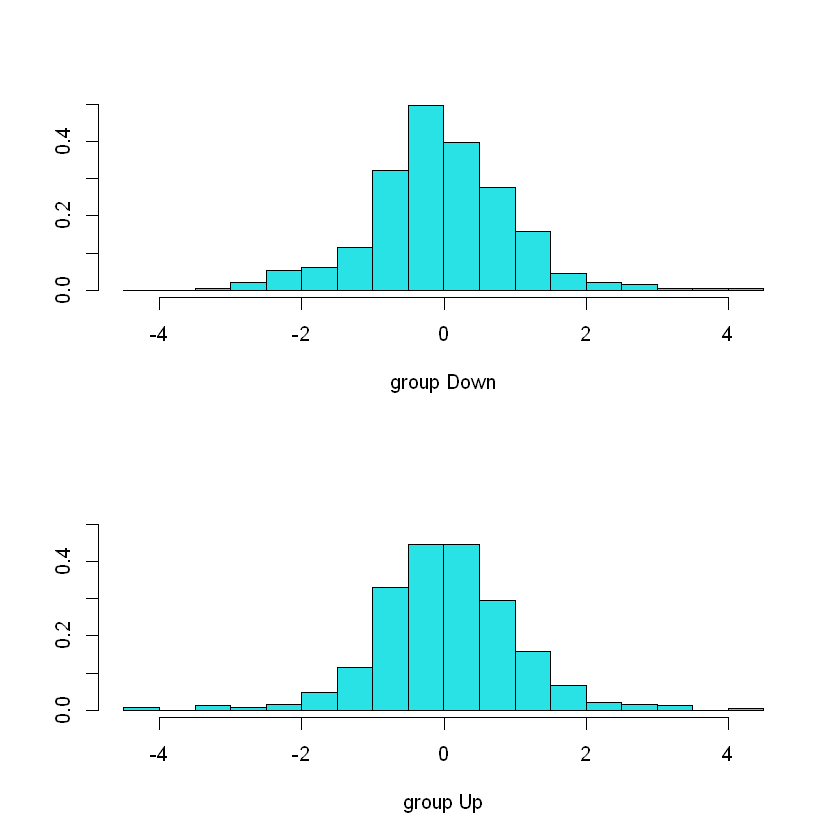

In [12]:
# Two group histograms look very similar... No surprise, it's not easy to predict the stock market.
plot(lda.fit)

In [14]:
# See how well our rule predicts on the year 2005
# First param is the dataset, Stock Market...
# Second param is logical expressions that can
# use the variables in that dataframe to define the subset.
Smarket.2005 <- subset(Smarket, Year == 2005)


In [21]:
# Use that as the test data; call predict.
lda.pred <- predict(lda.fit, Smarket.2005)
# Print the first 5 of these.
lda.pred[1:5,]

ERROR: Error in lda.pred[1:5, ]: incorrect number of dimensions


In [20]:
# Oops, result is a list, let's cast to a Data Frame to look.
class(lda.pred)
data.frame(lda.pred)[1:5,] 

[1] "list"

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892


In [22]:
# Table of the class as the prediction vs the true value as the response.
table(lda.pred$class, Smarket.2005$Direction)
# We get a confusion matrix which tells us which downs were classified as down,
# which downs were classified as up, and the diagonal elements which are the
# correct classification.

      
       Down  Up
  Down   35  35
  Up     76 106

In [29]:
# Predicted class is equal to the true class
# Trues and falses can be coerced to be 1 or 0, so we can take the mean of that.
mean(lda.pred$class == Smarket.2005$Direction)
# Not huge, but in this kind of industry any little edge helps.

[1] 0.5595238